# Reading SW4 output

In this tutorial we shall go over several examples to show how to read SW4 output.

In [1]:
import os
import sys

import pySW4 as sw4
import obspy
import matplotlib.pyplot as plt
import numpy as np

## Images

(<matplotlib.figure.Figure at 0x11c4bb890>,
 <matplotlib.colorbar.Colorbar at 0x11fc837d0>)

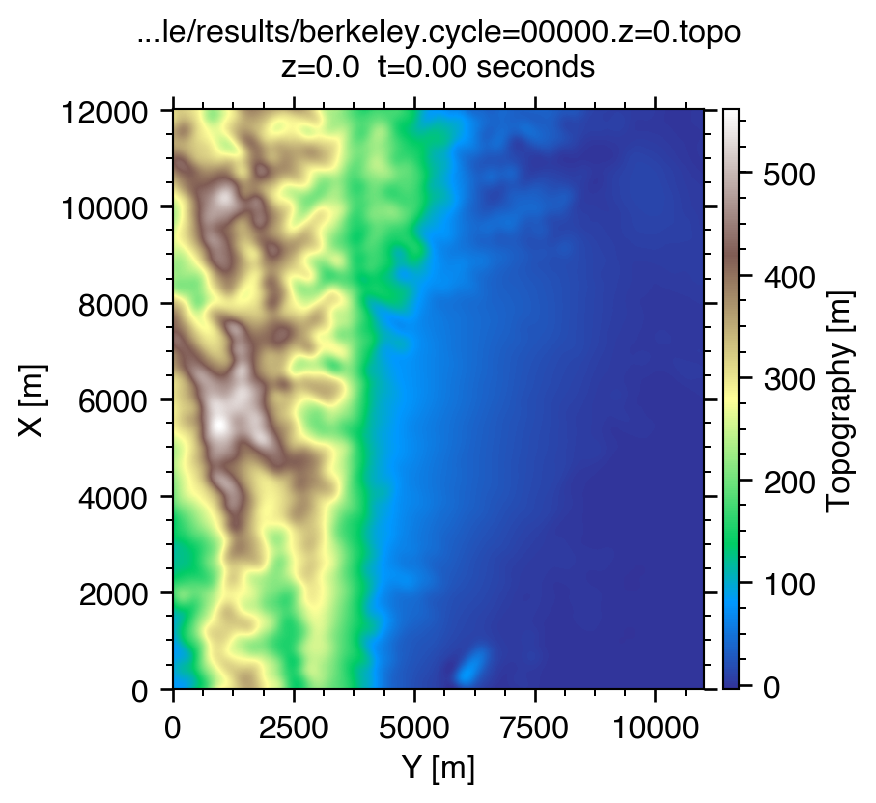

In [3]:
f = '../sw4-v1.1/examples/rfile/results/berkeley.cycle=00000.z=0.topo.sw4img'
topo = sw4.read_image(f)
topo.plot(cmap='terrain')

### Plotting with symbols

pySW4 can parse the input file and plot source and station locations automatically.

        Image information :
        ----------------- :
                 Filename : image.cycle=0000.x=100.s.sw4img
                Precision : <type 'numpy.float32'>
        Number of patches : 1
                  Time, s : 0.0
                    Plane : x
               Coordinate : 96.0
                     Mode : Vs, m/s
Curvilinear grid included : False
             Image extent : (-4.0, 1508.0, -4.0, 2004.0)
            Creation time : Tue Apr 24 09:54:19 2018

Patch information :
----------------- :
           Number : 0
       Spacing, m : 8.0
          Zmin, m : 0.0
           Extent : (-4.0, 1508.0, -4.0, 2004.0)
               ni : 189
               nj : 251
              Max : 4017.00732422
              Min : 371.393249512
              STD : 471.299468994
              RMS : 3092.97900391



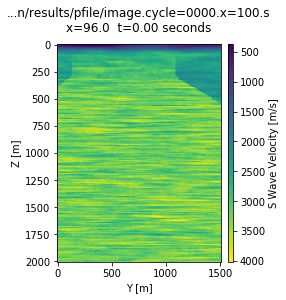

In [21]:

#how is this different than the other 1
f = '/home/eeckert/git/rFileArben/results/pfile/image.cycle=0000.x=100.s.sw4img'

image = sw4.read_image(f)

print image
for patch in image.patches:
    print patch
    
fig, ax, cb = image.plot()

Velocity magnitude plots

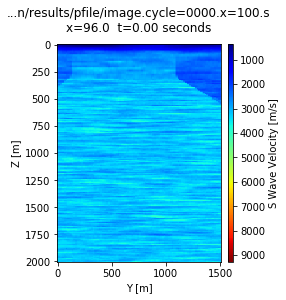

In [18]:
#f = '/home/eeckert/git/rFileArben/results/pfile/image.cycle=0000.x=100.s.sw4img'

image = sw4.read_image(f)
    
fig, ax, cb = image.plot(vmax='3', cmap='jet')

Horizontal Peak Ground Velocity (HPGV) plots

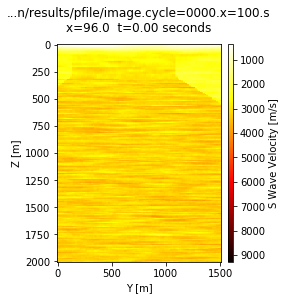

In [14]:
#f = '../sw4-v1.1/examples/rfile/results/berkeley.cycle=14016.z=0.hmaxdudt.sw4img'

image = sw4.read_image(f)
    
fig, ax, cb = image.plot(vmax='3', cmap='hot_r')

### Plotting cross-section patches

In [23]:
#f = '../sw4-v1.1/examples/rfile/results/berkeley.cycle=00000.x=2500.p.sw4img'
image = sw4.read_image(f)

print image
for patch in image.patches:
    print patch

print image.curvilinear_grid_patch
    
image.patches[1].plot()
image.patches[0].plot()

        Image information :
        ----------------- :
                 Filename : image.cycle=0000.x=100.s.sw4img
                Precision : <type 'numpy.float32'>
        Number of patches : 1
                  Time, s : 0.0
                    Plane : x
               Coordinate : 96.0
                     Mode : Vs, m/s
Curvilinear grid included : False
             Image extent : (-4.0, 1508.0, -4.0, 2004.0)
            Creation time : Tue Apr 24 09:54:19 2018

Patch information :
----------------- :
           Number : 0
       Spacing, m : 8.0
          Zmin, m : 0.0
           Extent : (-4.0, 1508.0, -4.0, 2004.0)
               ni : 189
               nj : 251
              Max : 4017.00732422
              Min : 371.393249512
              STD : 471.299468994
              RMS : 3092.97900391



AttributeError: Image instance has no attribute 'curvilinear_grid_patch'

### Plotting the entire cross-section

(2004.0, -304.0)

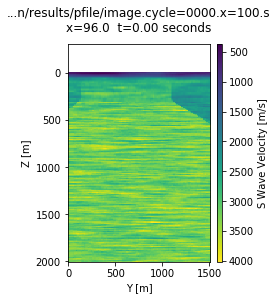

In [24]:
fig, ax, cb = image.plot(projection_distance=1000)
ax.set_ylim(image.extent[3], image.extent[2]-300)

(2004.0, -304.0)

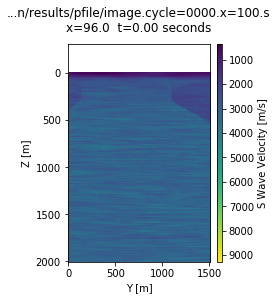

In [25]:
#f = '../sw4-v1.1/examples/rfile/results/berkeley.cycle=01402.x=2500.magdudt.sw4img'
image = sw4.read_image(f)

fig, ax, cb = image.plot(vmax='3', projection_distance=1000)
ax.set_ylim(image.extent[3], image.extent[2]-300)

In [26]:
#f = '../sw4-v1.1/examples/rfile/results/berkeley.cycle=00000.y=2500.p.sw4img'
image = sw4.read_image(f,)

print image
for patch in image.patches:
    print patch

print image.curvilinear_grid_patch
    
image.patches[1].plot()
image.patches[0].plot()
fig, ax, cb = image.plot(projection_distance=1800)
ax.set_ylim(image.extent[3], image.extent[2]-300)

        Image information :
        ----------------- :
                 Filename : image.cycle=0000.x=100.s.sw4img
                Precision : <type 'numpy.float32'>
        Number of patches : 1
                  Time, s : 0.0
                    Plane : x
               Coordinate : 96.0
                     Mode : Vs, m/s
Curvilinear grid included : False
             Image extent : (-4.0, 1508.0, -4.0, 2004.0)
            Creation time : Tue Apr 24 09:54:19 2018

Patch information :
----------------- :
           Number : 0
       Spacing, m : 8.0
          Zmin, m : 0.0
           Extent : (-4.0, 1508.0, -4.0, 2004.0)
               ni : 189
               nj : 251
              Max : 4017.00732422
              Min : 371.393249512
              STD : 471.299468994
              RMS : 3092.97900391



AttributeError: Image instance has no attribute 'curvilinear_grid_patch'

## Seismograms

### Station array or line
Reading an array or a line of stations added to the input file by [station_array](http://shaharkadmiel.github.io/pySW4/packages/pySW4.prep.stations.html#pySW4.prep.stations.station_array) or [station_line](http://shaharkadmiel.github.io/pySW4/packages/pySW4.prep.stations.html#pySW4.prep.stations.station_line).

In [11]:
name = 'surface'
path = '../sw4-v1.1/examples/rfile/results'
array = sw4.read_stations(name, path, 'velocity')

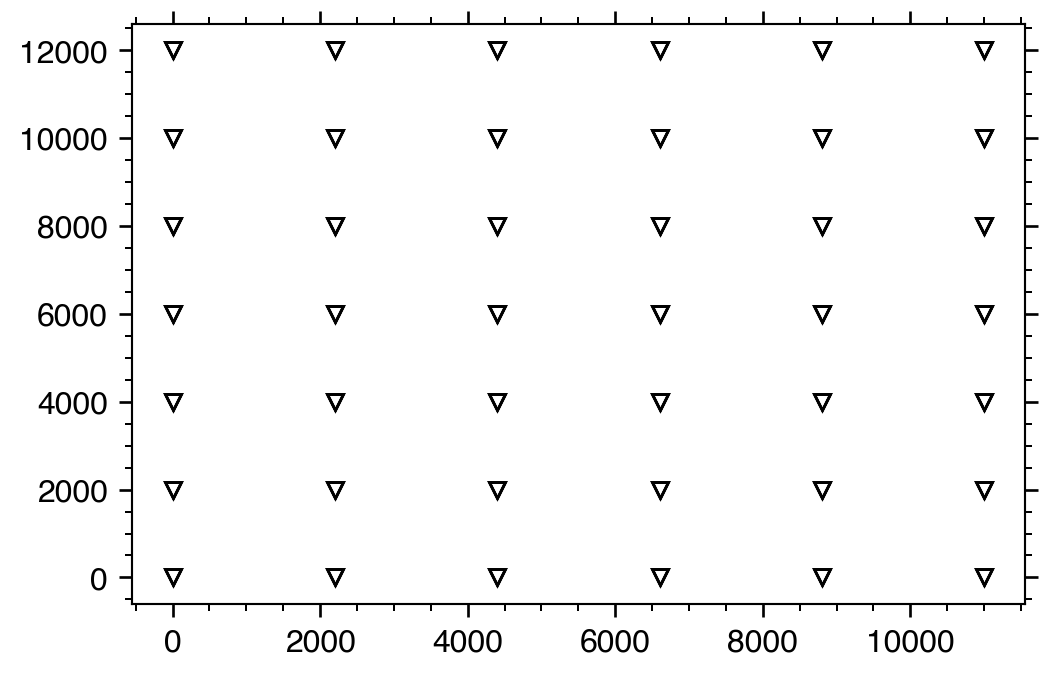

In [12]:
for sta in array:
    x, y, z = (sta.stats.coordinates.x,
               sta.stats.coordinates.y,
               sta.stats.coordinates.z)
               
    plt.plot(y, x,'kv', mfc='none')

/Users/shahar/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


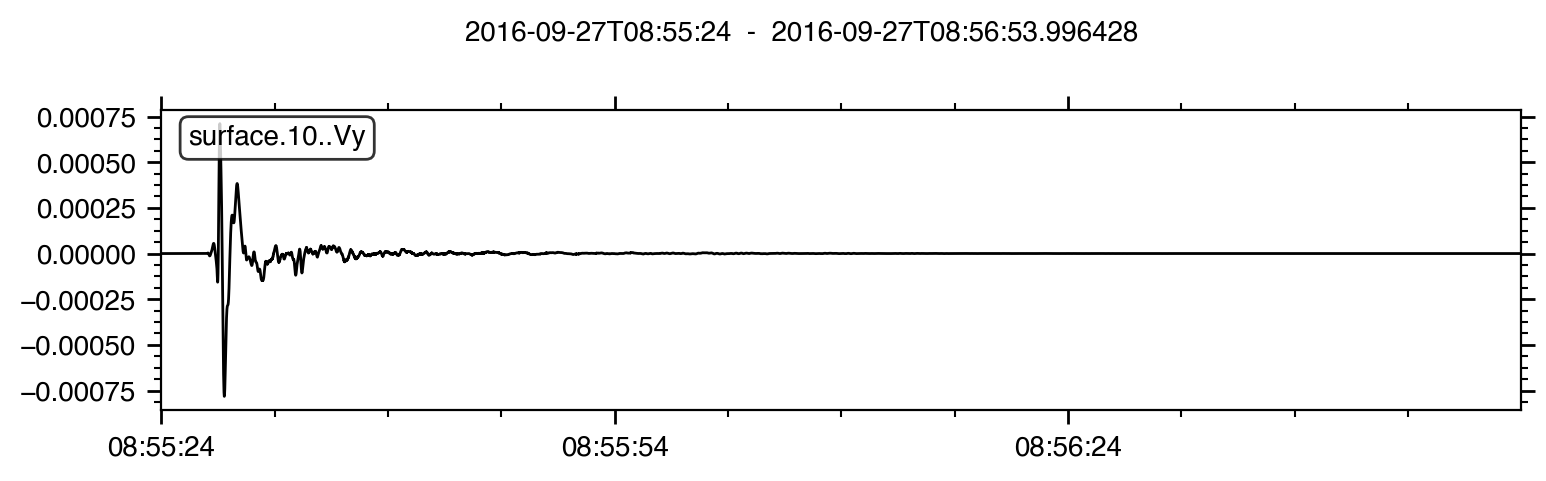

In [13]:
array[10].plot()

Plot time slices of the Z component through all stations of the array

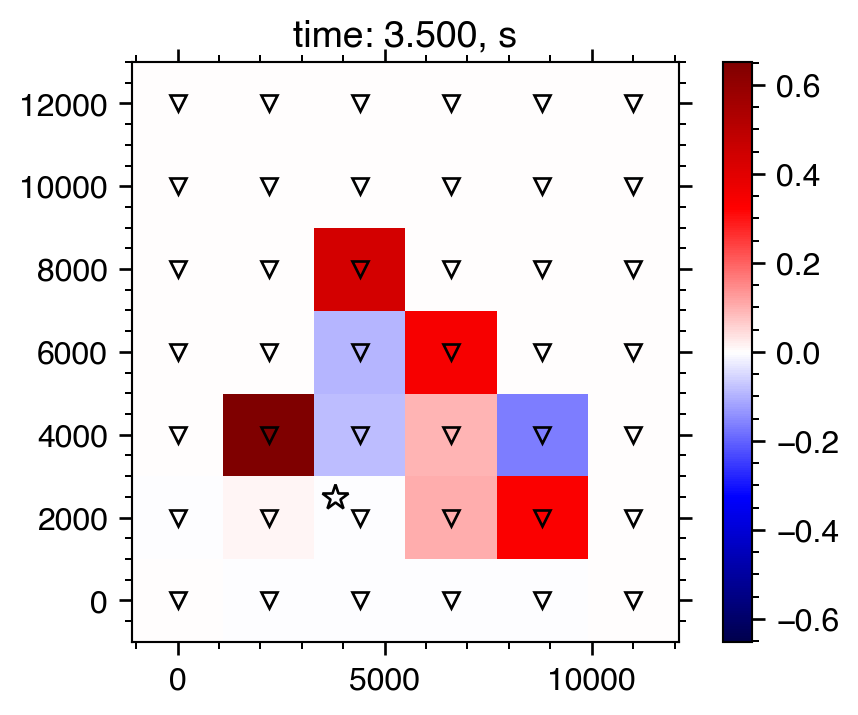

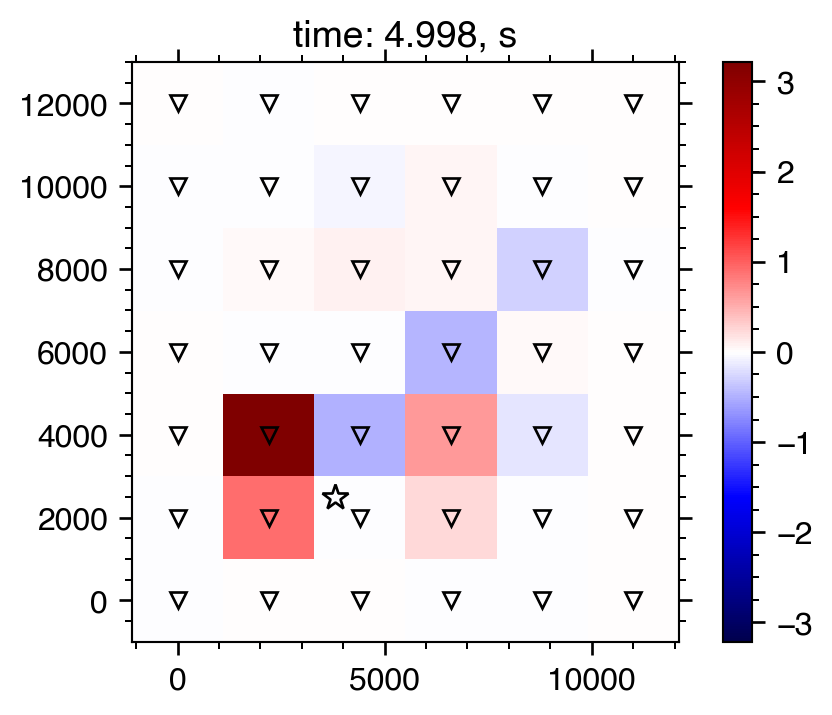

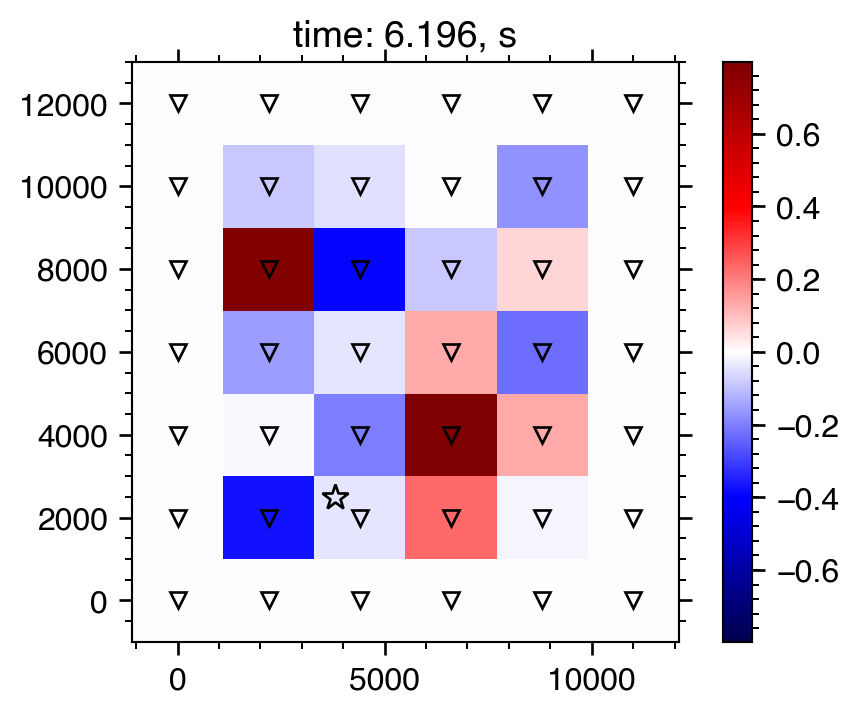

In [14]:
x, y = input_.source[0].x, input_.source[0].y
z_data = array.get_data('*Z')

for time in (3.5, 5.0, 6.2):
    fig, ax = plt.subplots()
    
    step = int(time / array.delta)
    values_t = z_data[:, :, step]
    max_ = np.abs(values_t).max()
    im = ax.imshow(values_t, interpolation='nearest', extent=array.extent,
               cmap='seismic', vmin=-max_, vmax=max_, origin='lower')
    plt.colorbar(im)
    ax.set_title('time: {:.3f}, s'.format(array.times()[step]))
    
    ax.plot(y, x, 'k*', mfc='none', ms=10)
    
    [ax.plot(y_, x_, 'kv', mfc='none') for x_ in array.xi for y_ in array.yi ]

### Single station
Reading and plotting with obspy

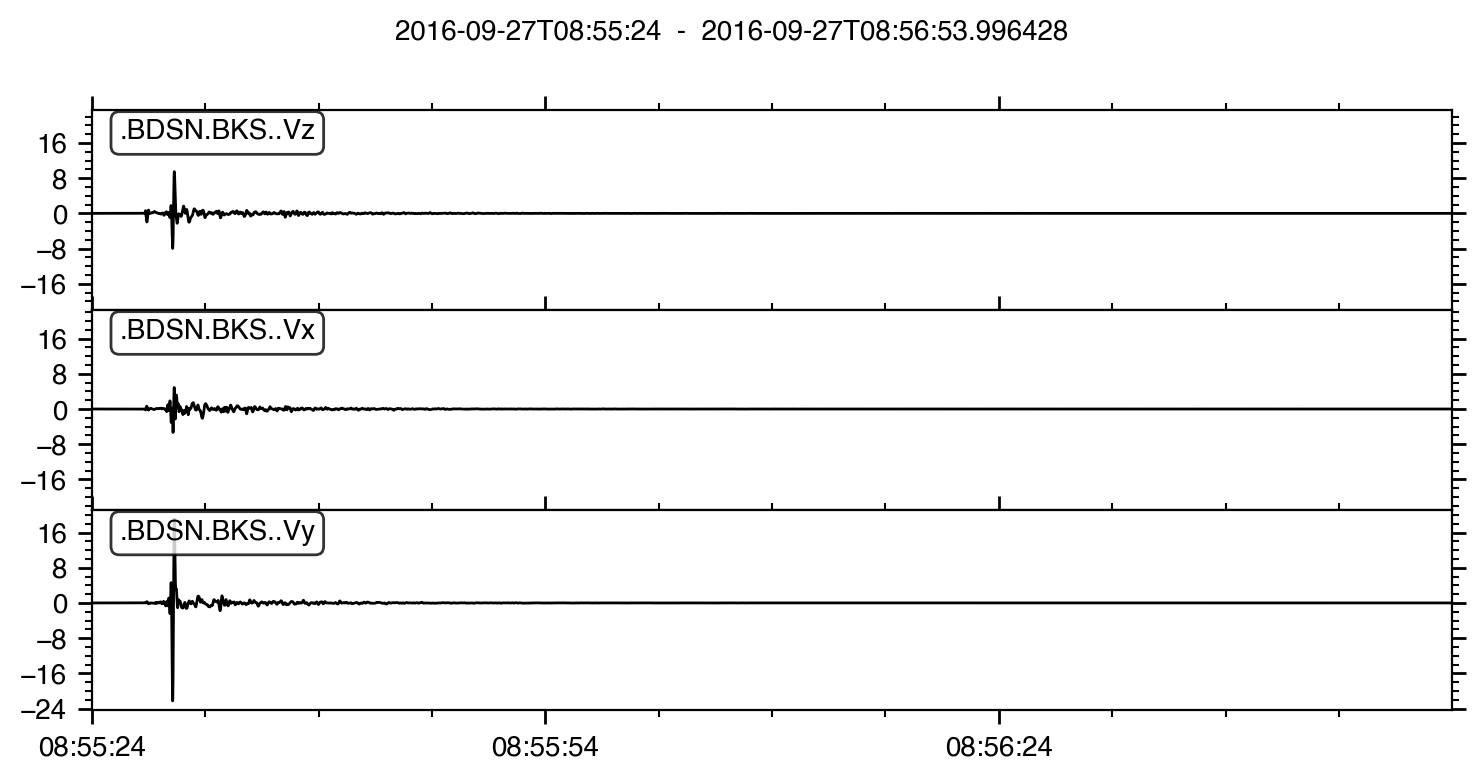

In [15]:
st = obspy.read('../sw4-v1.1/examples/rfile/results/BDSN.BKS*', 'SAC')
st.plot(size=(800, 400))

Reading and plotting with pySW4

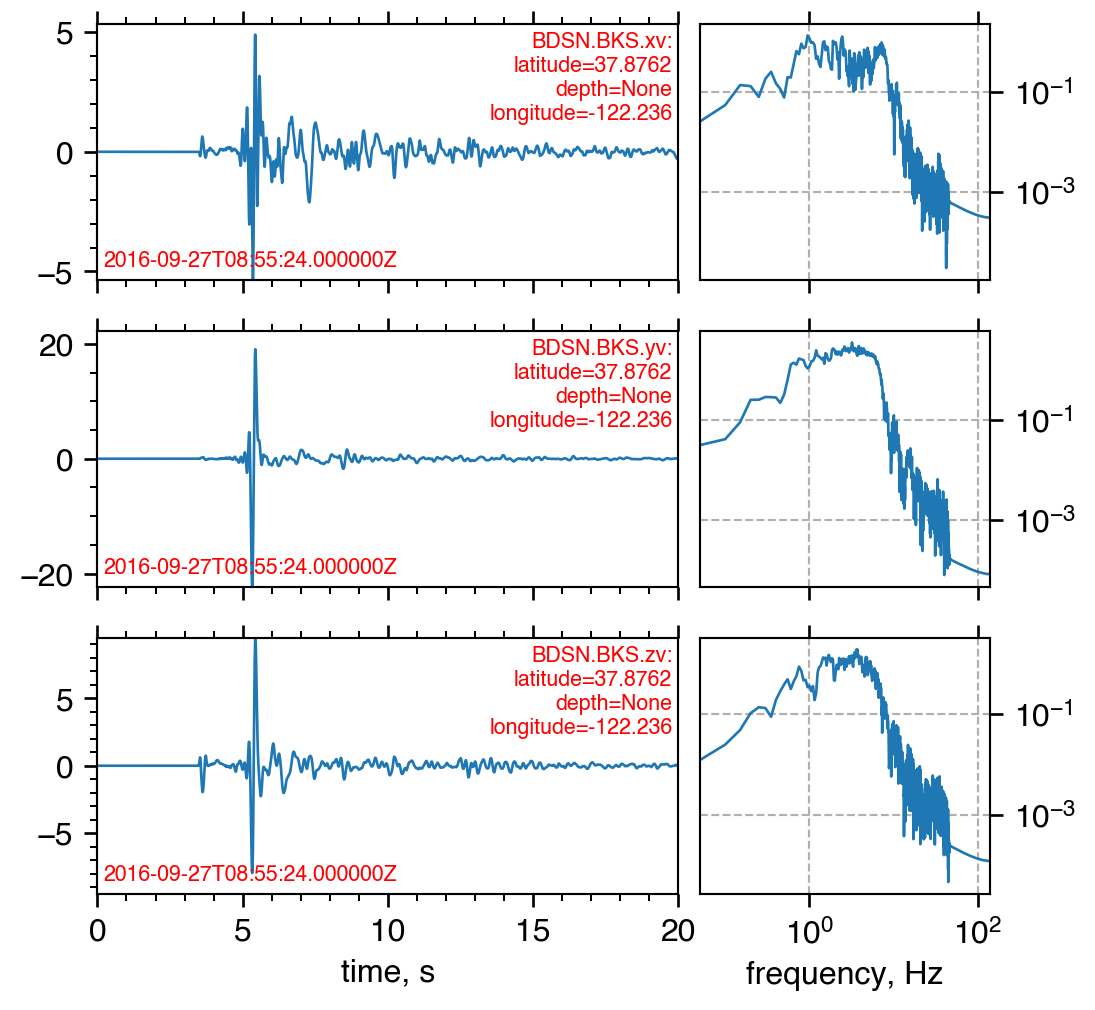

In [16]:
name = 'BDSN.BKS'
path = '../sw4-v1.1/examples/rfile/results'
st = sw4.read_stations(name, path, 'velocity')

starttime = st.starttime
st.trim(endtime=starttime + 20)
fig, ax = st.plot_traces(lw=1)